In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Load and parse data

In [128]:
filename = "../data/pbc2.csv"
df = pd.read_csv(filename)
df.rename(columns = {'status2' : 'label'}, inplace=True)
FEATURE_COLUMNS = ['year','serBilir','albumin',
             'alkaline', 'SGOT', 'platelets', 
             'prothrombin']
FEATURE_WITHOUT_YEAR = ['serBilir','albumin',
             'alkaline', 'SGOT', 'platelets', 
             'prothrombin']

<BarContainer object of 15 artists>

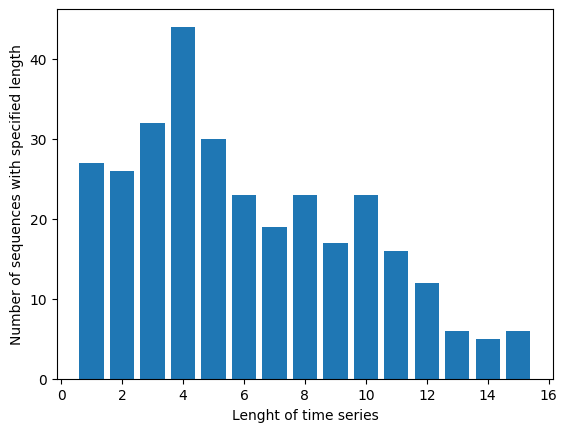

In [129]:
l_nb = [(df.id.value_counts() == i).value_counts()[True] for i in range(1,16)]
x = np.arange(1,16)
fig, ax = plt.subplots()
ax.set_xlabel('Lenght of time series')
ax.set_ylabel('Number of sequences with specified length')
plt.bar(x,l_nb)

In [135]:
df.isna().sum()

Unnamed: 0        0
id                0
years             0
status            0
drug              0
age               0
sex               0
year              0
ascites          60
hepatomegaly     61
spiders          58
edema             0
serBilir          0
serChol         821
albumin           0
alkaline         60
SGOT              0
platelets        73
prothrombin       0
histologic        0
label             0
dtype: int64

In [123]:
sequences = []

for series_id, group in df.groupby('id'):
    sequences_features = group[FEATURE_COLUMNS]
    label = group.iloc[0].label
    sequences.append([sequences_features, label])

In [124]:
def prepadding_dataframe(df_list, max_len):
    df_cols = df_list[0][0].columns.to_list()
    print(df_list[0][0])
    for i in range(len(df_list)):
        padd_length = max_len - len(df_list[i][0]['year'])
        padding_df = pd.DataFrame(
            0., index=range(padd_length), columns = df_cols)
        df_list[i][0] = pd.concat([padding_df, df_list[i][0]])
    print(df_list[0][0])

prepadding_dataframe(sequences, 16)

       year  serBilir  albumin  alkaline   SGOT  platelets  prothrombin
0  0.000000      14.5     2.60    1718.0  138.0      190.0         12.2
1  0.525682      21.3     2.94    1612.0    6.2      183.0         11.2
        year  serBilir  albumin  alkaline   SGOT  platelets  prothrombin
0   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
1   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
2   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
3   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
4   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
5   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
6   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
7   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
8   0.000000       0.0     0.00       0.0    0.0        0.0          0.0
9   0.000000       0.0     0.00       0.0    0.0      